In [2]:
wt = read.csv('../data/munge1_30.csv')

In [3]:
wtts = ts(wt$waittime, frequency=48)

In [4]:
model1 = arima(wtts, order=c(4,1,0), seasonal = list(order=c(2,0,0), period=48), method = 'CSS')

In [5]:
model1


Call:
arima(x = wtts, order = c(4, 1, 0), seasonal = list(order = c(2, 0, 0), period = 48), 
    method = "CSS")

Coefficients:
         ar1      ar2      ar3      ar4    sar1    sar2
      0.1343  -0.0439  -0.0237  -0.0248  0.1864  0.1192
s.e.  0.0035   0.0034   0.0034   0.0034  0.0034  0.0034

sigma^2 estimated as 29.49:  part log likelihood = -277146.1

In [27]:
forecast

ERROR: Error in eval(expr, envir, enclos): object 'forecast' not found


## Forecast not supported in notebook.  Using predict instead.

In [11]:
pred = predict(model1, 336)

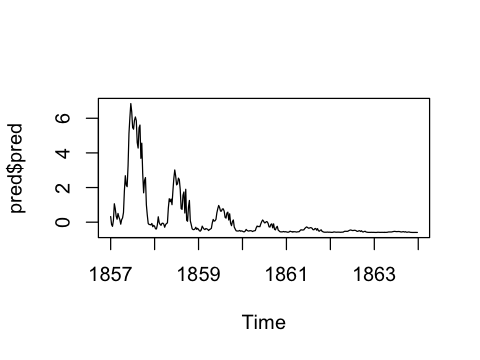

In [24]:
options(repr.plot.width=10, repr.plot.height=3)
plot(pred$pred)

## Need to incorporate exogenous variables

## Prototype with just year

In [57]:
X_train = read.csv('../data/munge1_30_train.csv')
X_test = read.csv('../data/munge1_30_test.csv')
ts_train = ts(X_train, freq=48)
ts_test = ts(head(X_test, 336), freq=48)

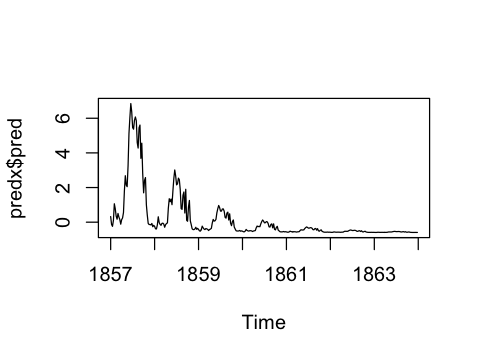

In [68]:
modelx1 = arima(wtts, order=c(4,1,0), seasonal = list(order=c(2,0,0), period=48), method = 'CSS', xreg=ts_train)
predx = predict(modelx1, 336, newxreg = ts_test)
plot(predx$pred)

## Incrementally add exogenous variables
When adding all date(as categoricals) and holiday features, ARIMA errored out

### Minofday

In [77]:
X_train = read.csv('../data/munge1_30_train.csv')
X_test = read.csv('../data/munge1_30_test.csv')
ts_train = ts(X_train, freq=48)
ts_test = ts(head(X_test, 336), freq=48)

In [78]:
modelx1 = arima(wtts, order=c(4,1,0), seasonal = list(order=c(2,0,0), period=48), method = 'CSS', xreg=ts_train)

In [80]:
model_minofday=modelx1

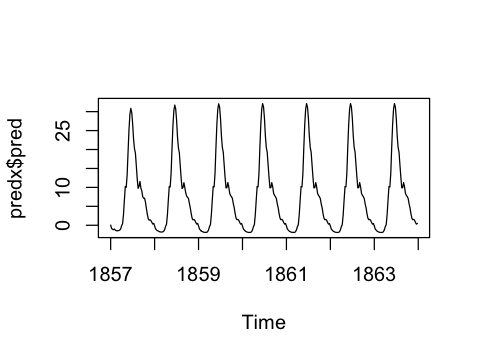

In [79]:
predx = predict(modelx1, 336, newxreg = ts_test)
plot(predx$pred)

### minofday and dayofweek 

In [85]:
X_train = read.csv('../data/munge1_30_train.csv')
X_test = read.csv('../data/munge1_30_test.csv')
ts_train = ts(X_train, freq=48)
ts_test = ts(head(X_test, 336), freq=48)

In [86]:
modelx1 = arima(wtts, order=c(4,1,0), seasonal = list(order=c(2,0,0), period=48), method = 'CSS', xreg=ts_train)

In [87]:
model_moddow = modelx1

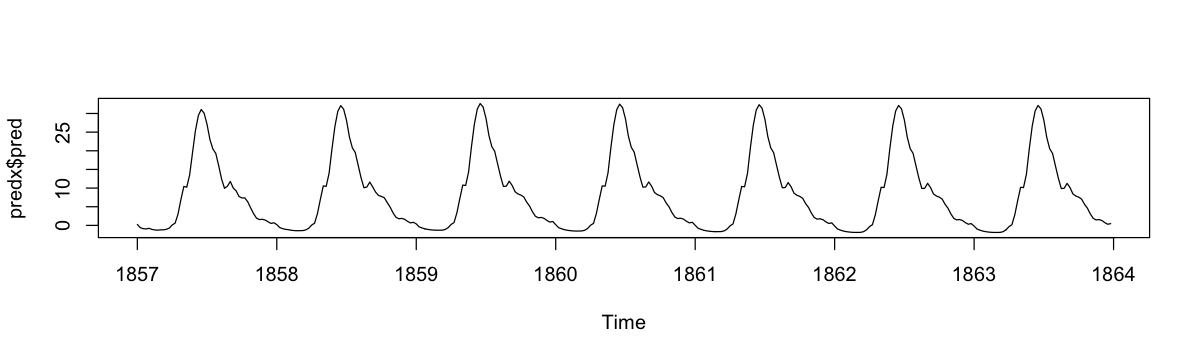

In [89]:
predx = predict(modelx1, 336, newxreg = ts_test)
options(repr.plot.width=10, repr.plot.height=3)
plot(predx$pred)

## All date features
 ['year', 'month', 'dayofmonth', 'dayofweek', 'minofday']

In [96]:
X_train = read.csv('../data/munge1_30_train.csv')
X_test = read.csv('../data/munge1_30_test.csv')
ts_train = ts(X_train, freq=48)
ts_test = ts(X_test, freq=48)

In [93]:
modelx1 = arima(wtts, order=c(4,1,0), seasonal = list(order=c(2,0,0), period=48), method = 'CSS', xreg=ts_train)

In [94]:
model_date = modelx1

In [ ]:
predx = predict(modelx1, length(ts_test), newxreg = ts_test)
options(repr.plot.width=10, repr.plot.height=3)

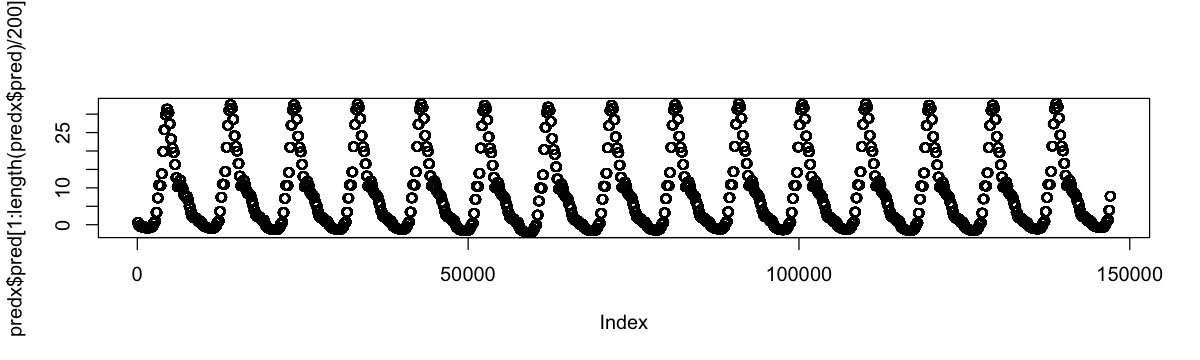

In [116]:
plot(predx$pred[1:length(predx$pred)/200])

## No variation in prediction even though exogenous variables vary by date.